In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [2]:
df = pd.read_csv("/content/heart.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


<a id="section-one"></a>
# **EDA**

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (303, 14)
Size      : 4242
Dimension : 2


In [5]:
df_copy.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df_copy.duplicated().sum()

1

In [7]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


In [8]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [9]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

<a id="section-two"></a>
# **VISUALIZATION**

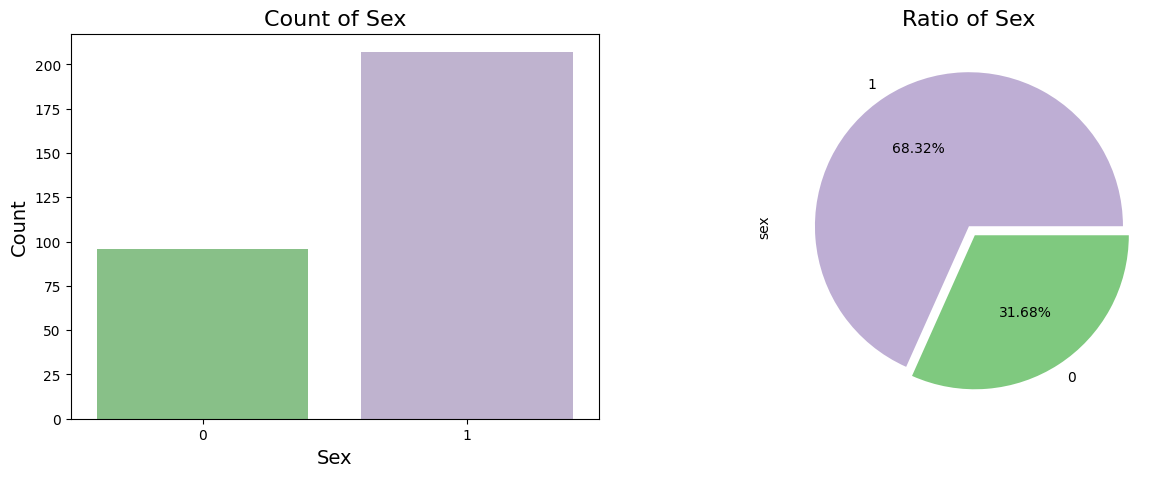

In [11]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['sex'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Sex", fontsize=16)

ax2 = df_copy['sex'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');
axs[1].set_title("Ratio of Sex", fontsize=16);

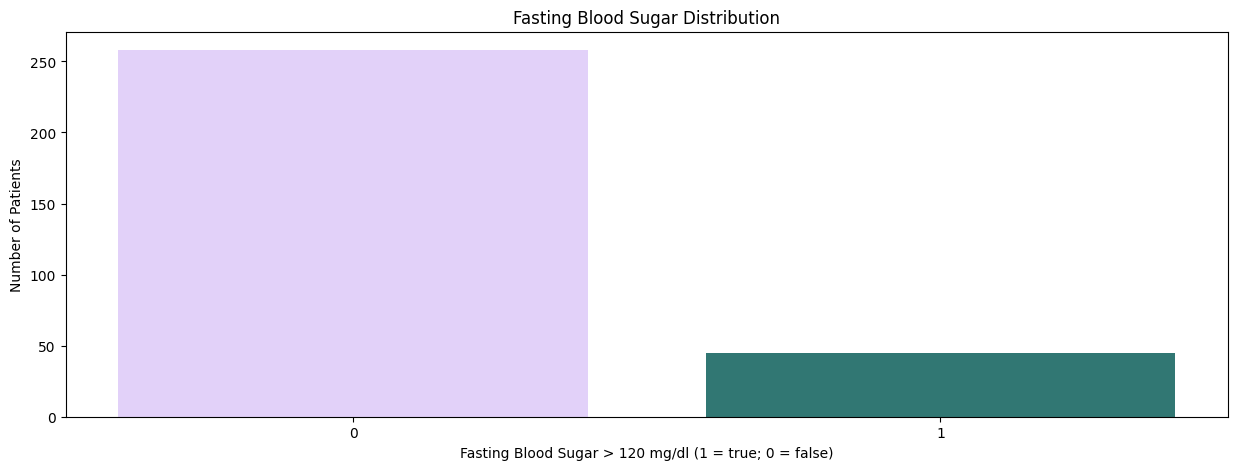

In [12]:
fbs_count = df['fbs'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(fbs_count.index, fbs_count.values, color=["#E2D1F9", "#317773"])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

### Exporting Correlation Matrix

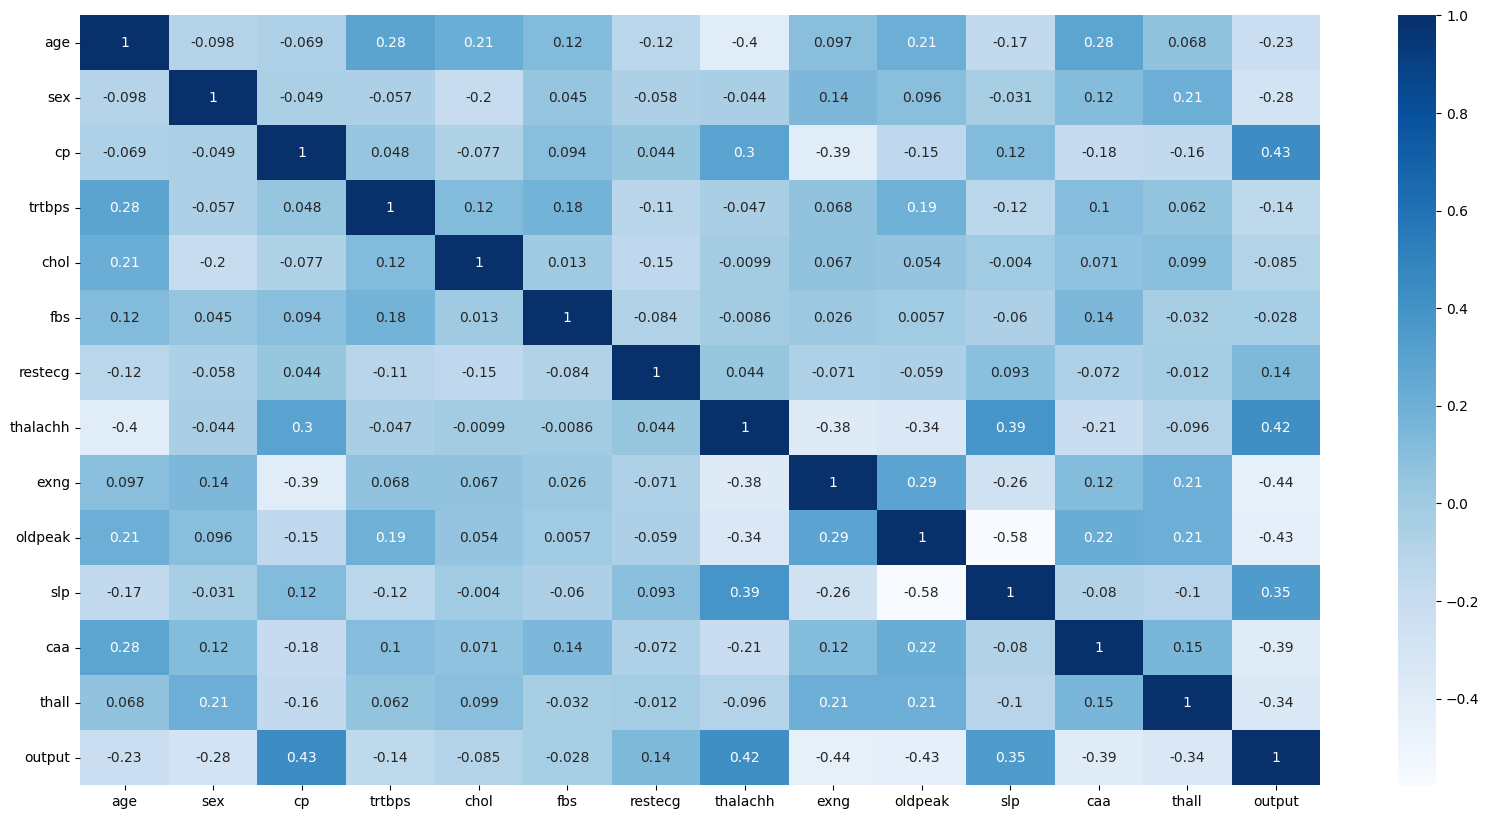

In [13]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

<a id="section-three"></a>
# **Feature Engineering**

<a id="section-four"></a>
## I. Missing Values

In [14]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

          Number of Missing Values  Ratio of Missing Values
age                              0                     0.00
sex                              0                     0.00
cp                               0                     0.00
trtbps                           0                     0.00
chol                             0                     0.00
fbs                              0                     0.00
restecg                          0                     0.00
thalachh                         0                     0.00
exng                             0                     0.00
oldpeak                          0                     0.00
slp                              0                     0.00
caa                              0                     0.00
thall                            0                     0.00
output                           0                     0.00


<a id="section-six"></a>
## II. Feature Extraction

In [15]:
df_copy['Age_CAT'] = pd.cut(x=df_copy['age'],
                            bins=[20, 40, 60, df_copy['age'].max()],
                            labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])

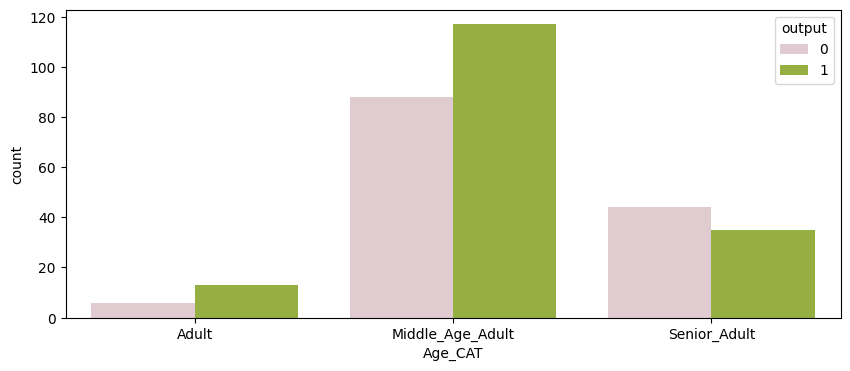

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_copy, x='Age_CAT',
              hue='output',
              order=["Adult", "Middle_Age_Adult", "Senior_Adult"],
              palette=["#E3C9CEFF", "#9FC131FF"])
plt.show()

In [17]:
cat_cols.append('Age_CAT')
cat_cols

['sex',
 'cp',
 'fbs',
 'restecg',
 'exng',
 'slp',
 'caa',
 'thall',
 'output',
 'Age_CAT']

<a id="section-seven"></a>
## IV. Encoding and Scaling

In [18]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df_copy.columns if 12 >= df_copy[col].nunique() > 2]
df_copy = one_hot_encoder(df_copy, ohe_cols, drop_first=True)

In [19]:
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

<a id="section-eight"></a>
# **Model Training**

In [20]:
y = df_copy["output"]
X = df_copy.drop("output", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (242, 24)
Shape of x_test is (61, 24)
Shape of y_train is (242,)
Shape of y_test is (61,)


In [26]:
models = [('LR', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
          ('CART', DecisionTreeClassifier(random_state=17)),
          ('RF', RandomForestClassifier(random_state=17))]

In [27]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')

########## LR ##########
Accuracy: 0.8613
Auc: 0.921
Recall: 0.8897
Precision: 0.8638
F1: 0.8741
########## CART ##########
Accuracy: 0.7361
Auc: 0.7354
Recall: 0.7522
Precision: 0.7624
F1: 0.7542
########## RF ##########
Accuracy: 0.792
Auc: 0.8954
Recall: 0.8051
Precision: 0.8148
F1: 0.8062


<a id="section-nine"></a>
# **TO-DO**
* Değişkenler arası bağlantılar detaylı incelenebilir.
    - Uni-variate
    - Bi-Variate
    - Multi-Variate
* Alan bilgisi (domain knowledge) ile yeni değişkenler elde edilebilir.
* Yeni modeller/algoritmalar ve çeşitli teknikler ile eğitim güçlendirelebilir.
* Hiper-parametre optimizasyonu yapılabilir.
    - GridSearch
    - RandomSearch
    - ...
* Değişkenlerin önem dereceleri gözlemlendikten sonra gerekli aksiyonlar alınabilir.
